In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import t

import datetime

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothicCoding'

/package/anaconda3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Data

In [2]:
df = pd.read_csv('./data/2장 - 시계열회귀분석/표2.7-전라북도지역도시가스판매량자료.txt', header=None)
df.columns = ['자료']
df

,자료
0,8291
1,7949
2,6739
3,5859
4,4420
5,2795
6,2002
7,2539
8,3307
9,5726


In [3]:
lst_time = []

for i in range(1995, 2000):
    for j in range(1, 13):
        lst_time.append(datetime.datetime(i, j, 1))

lst_time = lst_time[:-5]

df.index = lst_time
df

,자료
1995-01-01,8291
1995-02-01,7949
1995-03-01,6739
1995-04-01,5859
1995-05-01,4420
1995-06-01,2795
1995-07-01,2002
1995-08-01,2539
1995-09-01,3307
1995-10-01,5726


## 시각화

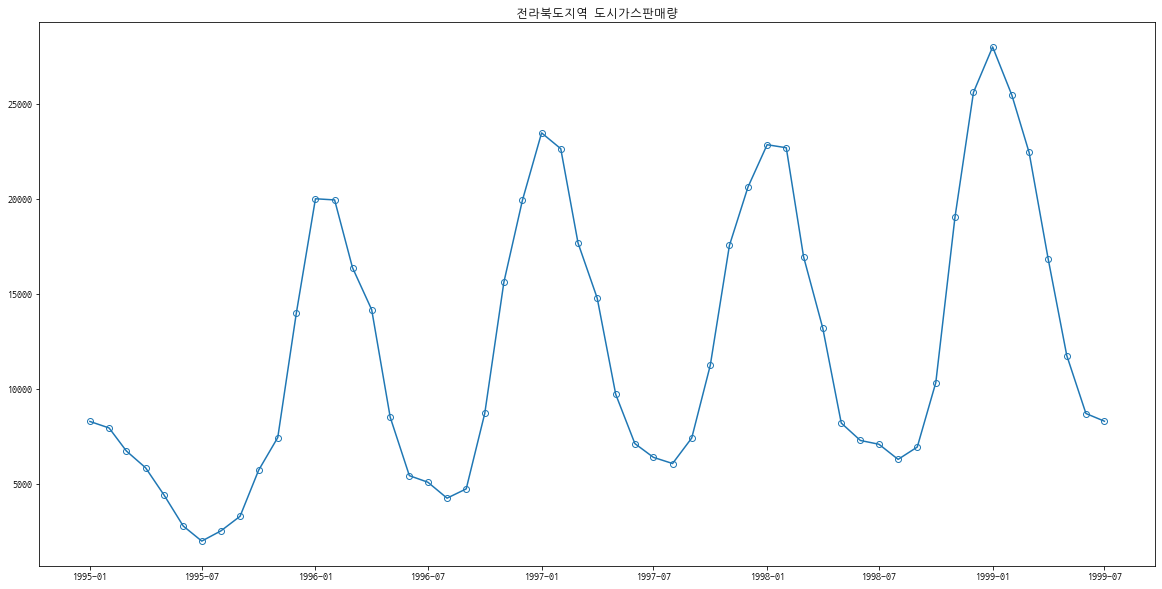

In [4]:
plt.figure(figsize=(20, 10))
plt.title('전라북도지역 도시가스판매량')
plt.plot(df['자료'], marker='o', markerfacecolor='none')
plt.show()

# 가변수

In [5]:
map_month2str = {1: '1월', 2: '2월', 3: '3월',
                 4: '4월', 5: '5월', 6: '6월',
                 7: '7월', 8: '8월', 9: '9월',
                 10: '10월', 11: '11월', 12: '12월'}

In [6]:
df['month'] = df.index.month
df['month'] = df['month'].map(map_month2str)

In [7]:
df

,자료,month
1995-01-01,8291,1월
1995-02-01,7949,2월
1995-03-01,6739,3월
1995-04-01,5859,4월
1995-05-01,4420,5월
1995-06-01,2795,6월
1995-07-01,2002,7월
1995-08-01,2539,8월
1995-09-01,3307,9월
1995-10-01,5726,10월


## dummy

In [8]:
df_dummy = pd.get_dummies(df)
df_dummy['time'] = range(1, len(df_dummy) + 1)
df_dummy = df_dummy[['time', 'month_1월', 'month_2월', 'month_3월', 'month_4월', 'month_5월', 'month_6월', 
                     'month_7월', 'month_8월', 'month_9월', 'month_10월', 'month_11월', '자료']]
df_dummy

,time,month_1월,month_2월,month_3월,month_4월,month_5월,month_6월,month_7월,month_8월,month_9월,month_10월,month_11월,자료
1995-01-01,1,1,0,0,0,0,0,0,0,0,0,0,8291
1995-02-01,2,0,1,0,0,0,0,0,0,0,0,0,7949
1995-03-01,3,0,0,1,0,0,0,0,0,0,0,0,6739
1995-04-01,4,0,0,0,1,0,0,0,0,0,0,0,5859
1995-05-01,5,0,0,0,0,1,0,0,0,0,0,0,4420
1995-06-01,6,0,0,0,0,0,1,0,0,0,0,0,2795
1995-07-01,7,0,0,0,0,0,0,1,0,0,0,0,2002
1995-08-01,8,0,0,0,0,0,0,0,1,0,0,0,2539
1995-09-01,9,0,0,0,0,0,0,0,0,1,0,0,3307
1995-10-01,10,0,0,0,0,0,0,0,0,0,1,0,5726


## split X, y

In [9]:
X = df_dummy.iloc[:, :-1]
y = df_dummy.iloc[:, -1]

In [10]:
X

,time,month_1월,month_2월,month_3월,month_4월,month_5월,month_6월,month_7월,month_8월,month_9월,month_10월,month_11월
1995-01-01,1,1,0,0,0,0,0,0,0,0,0,0
1995-02-01,2,0,1,0,0,0,0,0,0,0,0,0
1995-03-01,3,0,0,1,0,0,0,0,0,0,0,0
1995-04-01,4,0,0,0,1,0,0,0,0,0,0,0
1995-05-01,5,0,0,0,0,1,0,0,0,0,0,0
1995-06-01,6,0,0,0,0,0,1,0,0,0,0,0
1995-07-01,7,0,0,0,0,0,0,1,0,0,0,0
1995-08-01,8,0,0,0,0,0,0,0,1,0,0,0
1995-09-01,9,0,0,0,0,0,0,0,0,1,0,0
1995-10-01,10,0,0,0,0,0,0,0,0,0,1,0


In [11]:
y

1995-01-01     8291
1995-02-01     7949
1995-03-01     6739
1995-04-01     5859
1995-05-01     4420
1995-06-01     2795
1995-07-01     2002
1995-08-01     2539
1995-09-01     3307
1995-10-01     5726
1995-11-01     7447
1995-12-01    13976
1996-01-01    19998
1996-02-01    19937
1996-03-01    16373
1996-04-01    14168
1996-05-01     8513
1996-06-01     5442
1996-07-01     5096
1996-08-01     4259
1996-09-01     4747
1996-10-01     8712
1996-11-01    15619
1996-12-01    19921
1997-01-01    23461
1997-02-01    22630
1997-03-01    17671
1997-04-01    14775
1997-05-01     9714
1997-06-01     7127
1997-07-01     6404
1997-08-01     6080
1997-09-01     7422
1997-10-01    11241
1997-11-01    17544
1997-12-01    20611
1998-01-01    22839
1998-02-01    22680
1998-03-01    16950
1998-04-01    13209
1998-05-01     8207
1998-06-01     7291
1998-07-01     7093
1998-08-01     6298
1998-09-01     6946
1998-10-01    10332
1998-11-01    19017
1998-12-01    25594
1999-01-01    27981
1999-02-01    25455


## modeling

### sklearn LinearRegression
Ordinary least squares Linear Regression

In [12]:
reg = LinearRegression()

In [13]:
reg.fit(X, y)

LinearRegression()

In [14]:
reg.coef_

array([   204.51403509,   1511.07017544,    522.75614035,  -3378.75789474,
        -6650.87192982, -11299.18596491, -13752.7       , -14450.41403509,
       -14413.44385965, -13806.45789474, -10613.72192982,  -4914.23596491])

In [15]:
print('Intercept: {}'.format(reg.intercept_))
for i in range(len(reg.coef_)):
    if i == 0:
        print('time: {}'.format(reg.coef_[i]))
    else:
        print('D{}: {}'.format(i, reg.coef_[i]))

Intercept: 13890.078947371236
time: 204.5140350876187
D1: 1511.070175438601
D2: 522.7561403508953
D3: -3378.7578947368456
D4: -6650.871929824553
D5: -11299.185964912278
D6: -13752.700000000006
D7: -14450.414035087715
D8: -14413.443859649145
D9: -13806.457894736852
D10: -10613.721929824562
D11: -4914.235964912281


In [16]:
df_pred = pd.DataFrame(reg.predict(X), index=df.index, columns=['pred'])

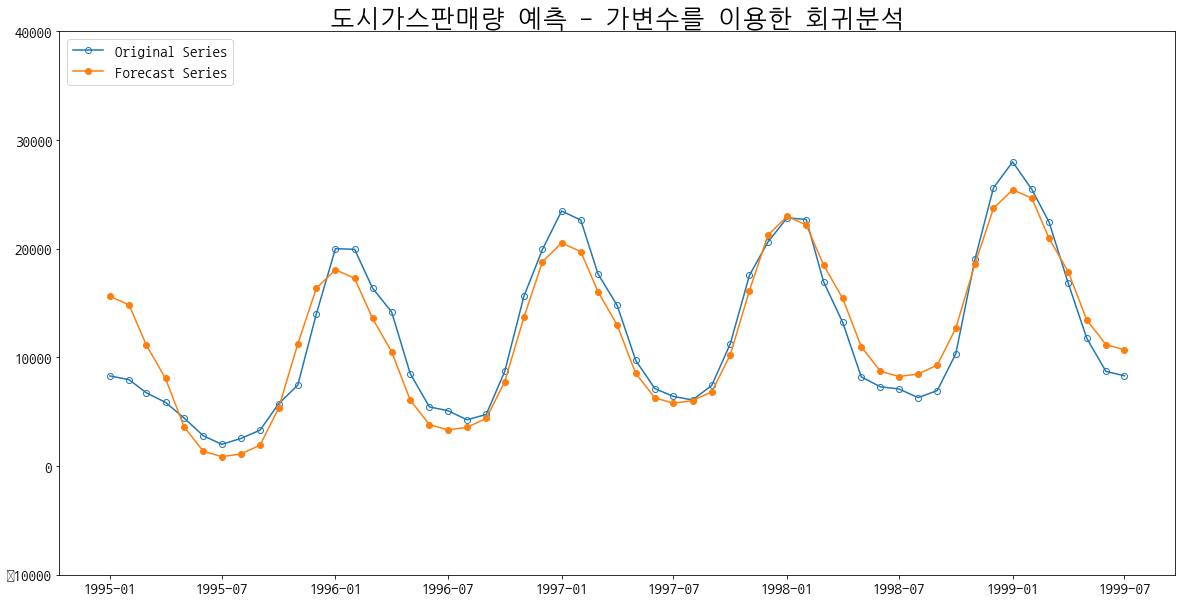

In [17]:
plt.figure(figsize=(20, 10))
plt.title('도시가스판매량 예측 - 가변수를 이용한 회귀분석', fontsize=25)
plt.plot(df['자료'], marker='o', markerfacecolor='none')
plt.plot(df_pred['pred'], marker='o')
plt.rc('legend', fontsize=15)
plt.legend(['Original Series', 'Forecast Series'], loc='upper left')
plt.ylim(-10000, 40000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### statsmodels regression
Ordinary Least Squares

In [18]:
X = sm.add_constant(X)
model = sm.OLS(y, X)

In [19]:
results = model.fit()

In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     자료   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     28.83
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.02e-16
Time:                        20:11:41   Log-Likelihood:                -504.22
No. Observations:                  55   AIC:                             1034.
Df Residuals:                      42   BIC:                             1061.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.389e+04   1490.880      9.317      0.0

In [21]:
conf_interval = results.conf_int(alpha=0.05)
conf_interval.columns = ['lower', 'upper']

In [22]:
conf_interval

,lower,upper
const,10881.360298,16898.797597
time,158.737839,250.290232
month_1월,-2087.823999,5109.964349
month_2월,-3073.516949,4119.029230
month_3월,-6972.991042,215.475252
month_4월,-10243.647265,-3058.096594
month_5월,-14891.086330,-7707.285600
month_6월,-17344.308661,-10161.091339
month_7월,-18042.314400,-10858.513670
month_8월,-18203.757156,-10623.130563


In [23]:
lower = (conf_interval['lower'] * X).sum(axis=1)
upper = (conf_interval['upper'] * X).sum(axis=1)

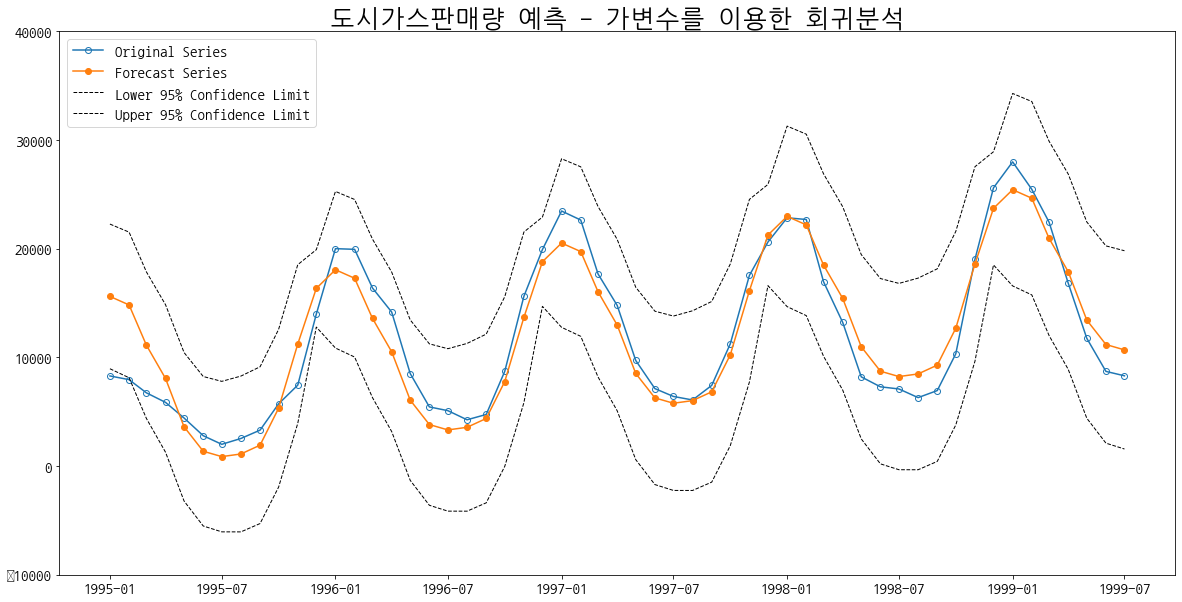

In [24]:
plt.figure(figsize=(20, 10))
plt.title('도시가스판매량 예측 - 가변수를 이용한 회귀분석', fontsize=25)
plt.plot(df['자료'], marker='o', markerfacecolor='none')
plt.plot(results.predict(X), marker='o')
plt.plot(lower, color='black', linestyle='--', linewidth=1)
plt.plot(upper, color='black', linestyle='--', linewidth=1)
plt.rc('legend', fontsize=15)
plt.legend(['Original Series', 'Forecast Series', 'Lower 95% Confidence Limit', 'Upper 95% Confidence Limit'], loc='upper left')
plt.ylim(-10000, 40000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 삼각함수

확산계절변동의 경우 삼각함수를 이용한 모형

- $z_t = \beta_0 + \beta_{1}t + \beta_{2} \,sin \left( 2\pi t \over L \right) + 
                                \beta_{3} \,t \,sin \left( 2\pi t \over L \right) + 
                                \beta_{2} \,cos \left( 2\pi t \over L \right) + 
                                \beta_{3} \,t \,cos \left( 2\pi t \over L \right) + \epsilon_t$

## split X, y

In [25]:
df['time'] = range(1, len(df) + 1)

trigo1 = []
trigo2 = []
trigo3 = []
trigo4 = []

L = 12
for time in df['time']:
    angle = 2 * 3.141592 * time / L
    
    trigo1.append(np.sin(angle))
    trigo2.append(time * np.sin(angle))
    trigo3.append(np.cos(angle))
    trigo4.append(time * np.cos(angle))

dic_trigo = {
    'time': df['time'], 
    'trigo1': trigo1,
    'trigo2': trigo2, 
    'trigo3': trigo3, 
    'trigo4': trigo4
}

df_trigo = pd.DataFrame(dic_trigo)
df_trigo.index = df.index

X = sm.add_constant(df_trigo)

In [26]:
X

,const,time,trigo1,trigo2,trigo3,trigo4
1995-01-01,1.0,1,4.999999e-01,0.500000,8.660255e-01,8.660255e-01
1995-02-01,1.0,2,8.660253e-01,1.732051,5.000002e-01,1.000000e+00
1995-03-01,1.0,3,1.000000e+00,3.000000,3.267949e-07,9.803847e-07
1995-04-01,1.0,4,8.660256e-01,3.464102,-4.999996e-01,-1.999998e+00
1995-05-01,1.0,5,5.000005e-01,2.500002,-8.660251e-01,-4.330126e+00
1995-06-01,1.0,6,6.535898e-07,0.000004,-1.000000e+00,-6.000000e+00
1995-07-01,1.0,7,-4.999993e-01,-3.499995,-8.660258e-01,-6.062180e+00
1995-08-01,1.0,8,-8.660250e-01,-6.928200,-5.000008e-01,-4.000006e+00
1995-09-01,1.0,9,-1.000000e+00,-9.000000,-9.803847e-07,-8.823462e-06
1995-10-01,1.0,10,-8.660259e-01,-8.660259,4.999991e-01,4.999991e+00


## modeling

### sklearn LinearRegression
Ordinary least squares Linear Regression

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(X, y)

LinearRegression()

In [29]:
print('Intercept: {}'.format(reg.intercept_))
for i in range(1, len(reg.coef_)):
    if i == 1:
        print('time: {}'.format(reg.coef_[i]))
    else: 
        print('trigo{}: {}'.format(i - 1, reg.coef_[i]))

Intercept: 6331.427115996021
time: 205.89783143495518
trigo1: 3724.676759031581
trigo2: 55.51067674205343
trigo3: 3540.622196640951
trigo4: 102.14625540370363


In [30]:
df_pred = pd.DataFrame(reg.predict(X), index=df.index, columns=['pred'])

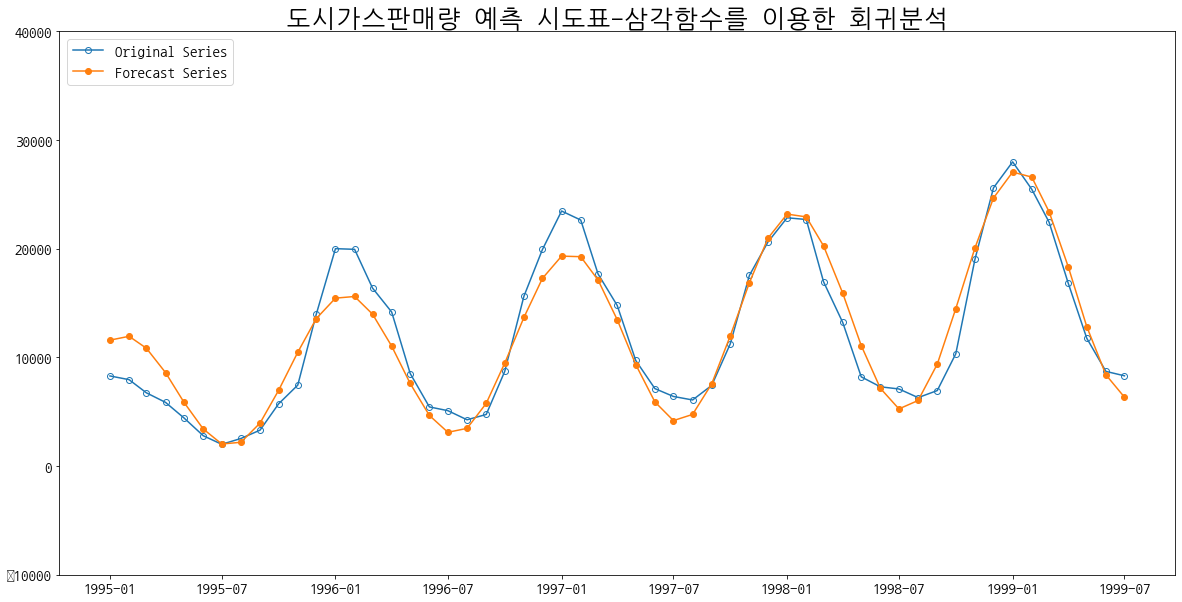

In [31]:
plt.figure(figsize=(20, 10))
plt.title('도시가스판매량 예측 시도표-삼각함수를 이용한 회귀분석', fontsize=25)
plt.plot(df['자료'], marker='o', markerfacecolor='none')
plt.plot(df_pred['pred'], marker='o')
plt.rc('legend', fontsize=15)
plt.legend(['Original Series', 'Forecast Series'], loc='upper left')
plt.ylim(-10000, 40000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### statsmodels regression
Ordinary Least Squares

In [32]:
model = sm.OLS(y, X)

In [33]:
results = model.fit()

In [34]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     자료   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     99.79
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.76e-24
Time:                        20:11:41   Log-Likelihood:                -498.96
No. Observations:                  55   AIC:                             1010.
Df Residuals:                      49   BIC:                             1022.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6331.4271    631.477     10.026      0.0

In [35]:
conf_interval = results.conf_int(alpha=0.05)
conf_interval.columns = ['lower', 'upper']

In [36]:
conf_interval

,lower,upper
const,5062.426143,7600.428089
time,166.127097,245.668566
trigo1,1945.915159,5503.438359
trigo2,-1.174233,112.195586
trigo3,1777.046064,5304.198329
trigo4,48.234531,156.057979


In [37]:
lower = (conf_interval['lower'] * X).sum(axis=1)
upper = (conf_interval['upper'] * X).sum(axis=1)

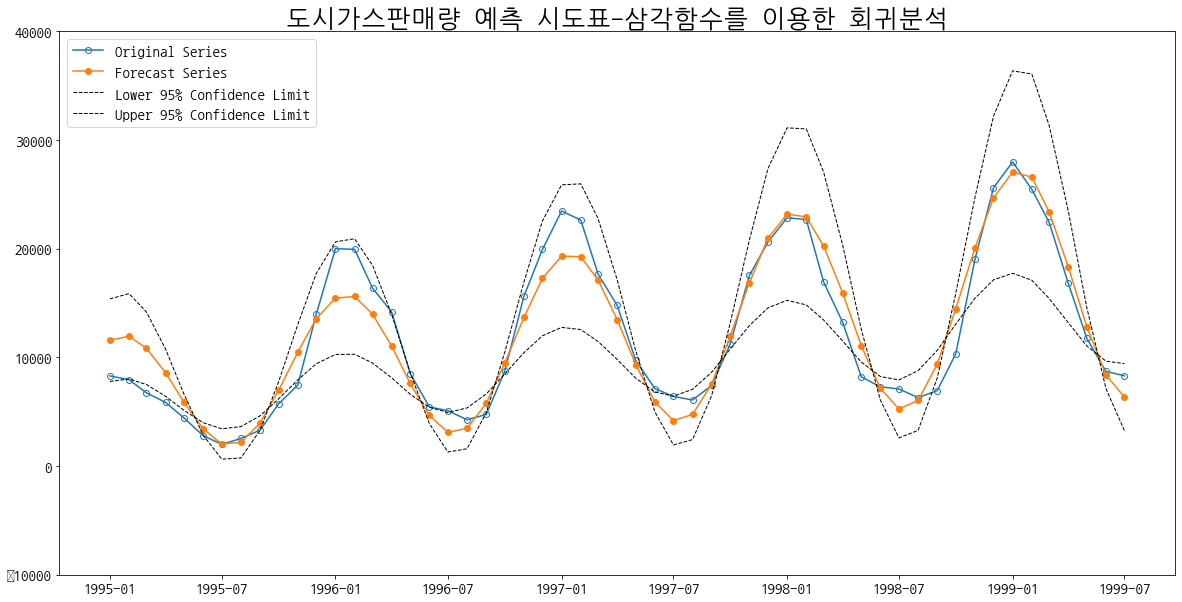

In [38]:
plt.figure(figsize=(20, 10))
plt.title('도시가스판매량 예측 시도표-삼각함수를 이용한 회귀분석', fontsize=25)
plt.plot(df['자료'], marker='o', markerfacecolor='none')
plt.plot(results.predict(X), marker='o')
plt.plot(lower, color='black', linestyle='--', linewidth=1)
plt.plot(upper, color='black', linestyle='--', linewidth=1)
plt.rc('legend', fontsize=15)
plt.legend(['Original Series', 'Forecast Series', 'Lower 95% Confidence Limit', 'Upper 95% Confidence Limit'], loc='upper left')
plt.ylim(-10000, 40000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()